In [1]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# %matplotlib inline
# import matplotlib as mpl

# mpl.rc('font', family = 'NanumGothic')
# mpl.rc('axes', unicode_minus=False)

# from sklearn.linear_model import LinearRegression

# from sklearn.tree import DecisionTreeRegressor
# from sklearn.tree import export_graphviz
# from sklearn.model_selection import train_test_split

# from sklearn.ensemble import RandomForestClassifier

# import mglearn

# from tensorflow import keras
# import graphviz
# from graphviz import Source

# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import SGDClassifier
# from sklearn.ensemble import VotingClassifier 

# from sklearn.metrics import confusion_matrix, classification_report  
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score 
# from sklearn.metrics import roc_curve, auc 

# from sklearn.model_selection import learning_curve, validation_curve
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import cross_validate

# from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB

# import warnings
# warnings.filterwarnings('ignore')

# red = pd.read_csv("D:/python3/data/winequality-red.csv")
# red = pd.read_csv("C:/python3/data/winequality-red.csv")
# red.tail()

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# mpl.rc('font', family = 'NanumGothic')
# mpl.rc('axes', unicode_minus=False)

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier 

from sklearn.metrics import confusion_matrix, classification_report  
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score 
from sklearn.metrics import roc_curve, auc 

from sklearn.model_selection import learning_curve, validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC

from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

import warnings
warnings.filterwarnings('ignore')

red = pd.read_csv("D:/python3/data/winequality-red.csv")
# red = pd.read_csv("C:/python3/data/winequality-red.csv")
red.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# red = pd.read_csv('/content/drive/MyDrive/winequality-red.csv')
# red.tail()

In [5]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
type(red)

pandas.core.frame.DataFrame

In [8]:
red.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

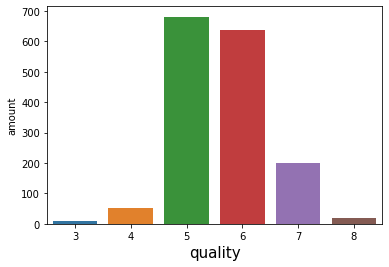

In [9]:
quals = red['quality'].value_counts().sort_index()

plt.rcParams['figure.figsize'] = [6,4]
sns.barplot(quals.index, quals.values)

plt.xlabel('quality', fontsize=15)
plt.ylabel('amount')
plt.show()

In [10]:
def fc(data):
    if data > 5:
        return 1
    return 0
red['quality'] = red['quality'].apply(fc)

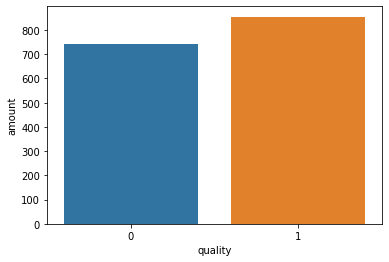

In [11]:
quals = red['quality'].value_counts().sort_index()

plt.rcParams['figure.figsize'] = [6,4]
sns.barplot(quals.index, quals.values)
plt.xlabel('quality')
plt.ylabel('amount')
plt.show()

In [12]:
red.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

|feature|특성|　　|feature|특성|
|:---:|:---:|:---:|:---:|:---:|
|fixed acidity|고정 산도|　　|volatile acidity|휘발성 산도|
|citric acid|시트르산(구연산)|　　|residual sugar|잔류 당|
|chlorides|염화물|　　|free sulfur dioxide|유리아황산|
|total sulfur dioxide|이산화황 총량|　　|density|밀도|
|pH|산도(수소이온농도)|　　|sulphates|황산염|
|alcohol|알코올 도수|　　|quality|품질|

In [13]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [14]:
# 스케일링 MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
X = red[red.columns.difference(['quality'])]
X.head()

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity
0,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,1.9,0.56,34.0,0.70
1,9.8,0.098,0.00,0.9968,7.8,25.0,3.20,2.6,0.68,67.0,0.88
2,9.8,0.092,0.04,0.9970,7.8,15.0,3.26,2.3,0.65,54.0,0.76
3,9.8,0.075,0.56,0.9980,11.2,17.0,3.16,1.9,0.58,60.0,0.28
4,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,1.9,0.56,34.0,0.70


In [15]:
scaler.fit(X)
X_scaled = scaler.transform(X)

In [16]:
X_scaled = pd.DataFrame(X_scaled)

In [17]:
X_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.153846,0.106845,0.00,0.567548,0.247788,0.140845,0.606299,0.068493,0.137725,0.098940,0.397260
1,0.215385,0.143573,0.00,0.494126,0.283186,0.338028,0.362205,0.116438,0.209581,0.215548,0.520548
2,0.215385,0.133556,0.04,0.508811,0.283186,0.197183,0.409449,0.095890,0.191617,0.169611,0.438356
3,0.215385,0.105175,0.56,0.582232,0.584071,0.225352,0.330709,0.068493,0.149701,0.190813,0.109589
4,0.153846,0.106845,0.00,0.567548,0.247788,0.140845,0.606299,0.068493,0.137725,0.098940,0.397260


In [18]:
X_scaled.columns = X.columns
X_scaled.head()

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity
0,0.153846,0.106845,0.00,0.567548,0.247788,0.140845,0.606299,0.068493,0.137725,0.098940,0.397260
1,0.215385,0.143573,0.00,0.494126,0.283186,0.338028,0.362205,0.116438,0.209581,0.215548,0.520548
2,0.215385,0.133556,0.04,0.508811,0.283186,0.197183,0.409449,0.095890,0.191617,0.169611,0.438356
3,0.215385,0.105175,0.56,0.582232,0.584071,0.225352,0.330709,0.068493,0.149701,0.190813,0.109589
4,0.153846,0.106845,0.00,0.567548,0.247788,0.140845,0.606299,0.068493,0.137725,0.098940,0.397260


In [19]:
import statsmodels.api as sm
y = red['quality']

X_scaled = sm.add_constant(X_scaled)
model = sm.OLS(y, X_scaled).fit()  
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     60.79
Date:                Fri, 28 May 2021   Prob (F-statistic):          6.19e-113
Time:                        09:43:05   Log-Likelihood:                -875.56
No. Observations:                1599   AIC:                             1775.
Df Residuals:                    1587   BIC:                             1840.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4490      0.098      4.590      0.000       0.257       0.641
alcohol                  0.9956      0.112      8.924      0.000       0.777       1.214
chlorides               -0.4675      0.163     -2.872      0.004      -0.787      -0.148
citric acid             -0.1894      0.095     -1.986      0.047      -0.377      -0.002
density                 -0.1040      0.191     -0.545      0.586      -0.479       0.271
fixed acidity            0.2631      0.190      1.385      0.166      -0.110       0.636
free sulfur dioxide      0.3169      0.100      3.172      0.002       0.121       0.513
pH                      -0.0864      0.158     -0.548      0.584      -0.396       0.223
residual sugar           0.1136      0.142      0.801      0.424      -0.165       0.392
sulphates                0.8563      0.124      6.920      0.000       0.614       1.099
total sulfur dioxide    -0.8912      0.134     -6.668      0.000      -1.153      -0.629
volatile acidity        -0.8256      0.115     -7.205      0.000      -1.050      -0.601
==============================================================================
Omnibus:                      177.412   Durbin-Watson:                   1.753
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.786
Skew:                           0.031   Prob(JB):                     1.55e-11
Kurtosis:                       2.138   Cond. No.                         40.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

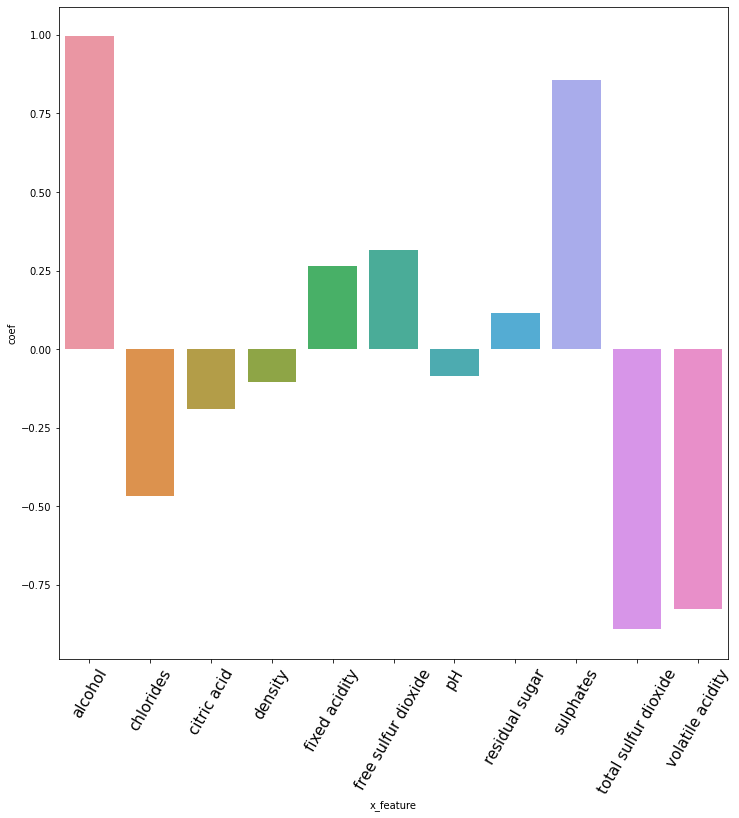

In [20]:
# 회귀계수를 이용해서 시각화
plt.rcParams['figure.figsize'] = [12,12]
coefs = model.params.tolist()[1:]      # params = parameters
coef_series = pd.Series(coefs)

x_labels = model.params.index.tolist()[1:]

# ax = coef_series.plot(kind = 'bar')
ax = sns.barplot(x_labels,coef_series)
ax.set_ylabel('coef')
ax.set_xlabel('x_feature')
ax.set_xticklabels(x_labels, rotation=60, fontsize=15)
plt.show()

In [21]:
# 회귀분석의 예측 성능을 높이기 위한 방법 : 다중 공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 피처들의 VIF 계수 출력
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]
vif['feature'] = X_scaled.columns
vif.round(1)

,VIF Factor,feature
0,86.8,const
1,3.0,alcohol
2,1.5,chlorides
3,3.1,citric acid
4,6.3,density
5,7.8,fixed acidity
6,2.0,free sulfur dioxide
7,3.3,pH
8,1.7,residual sugar
9,1.4,sulphates


In [22]:
vif[1:]

,VIF Factor,feature
1,3.031160,alcohol
2,1.481932,chlorides
3,3.128022,citric acid
4,6.343760,density
5,7.767512,fixed acidity
6,1.963019,free sulfur dioxide
7,3.329732,pH
8,1.702588,residual sugar
9,1.429434,sulphates
10,2.186813,total sulfur dioxide


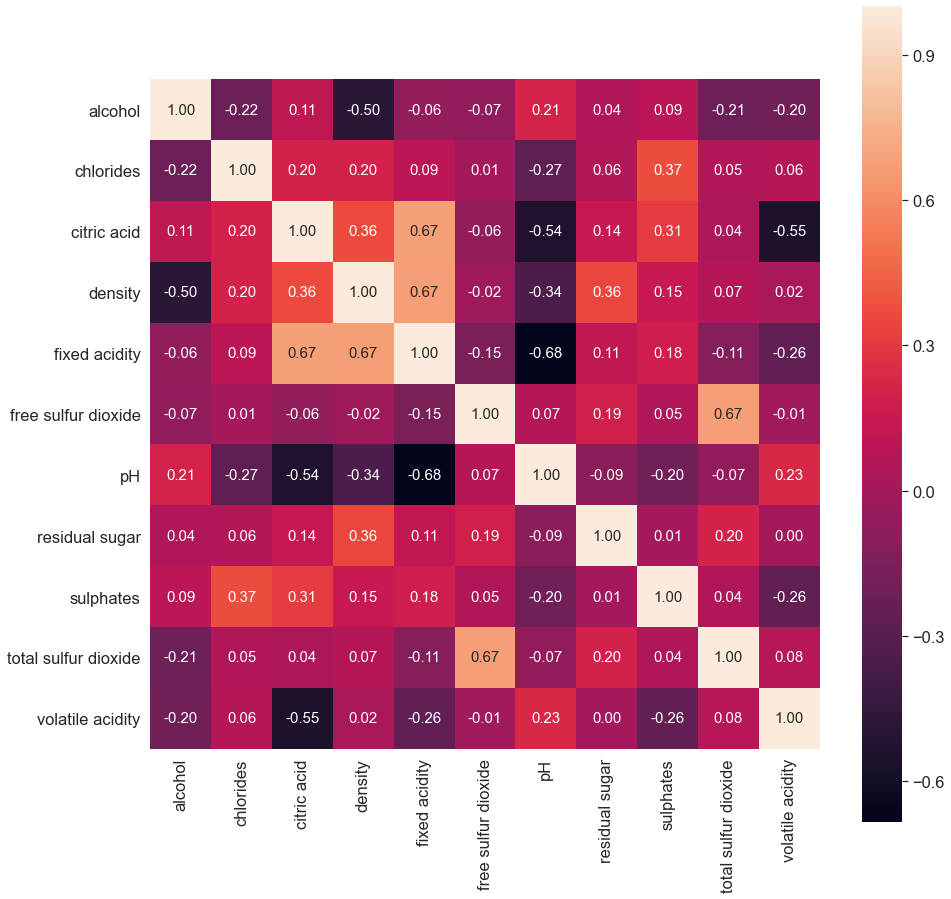

In [23]:
scale_columns = X_scaled.columns[1:]

corr = X_scaled[scale_columns].corr(method='pearson')
show_cols = X_scaled.columns[1:]

plt.rcParams['figure.figsize'] = [15, 15]
# plt.rc('font', family='Malgun Gothic')
sns.set(font_scale=1.5)       # 폰트 비율
hm = sns.heatmap(corr.values, cbar=True, annot=True, square=True, fmt='.2f',
                annot_kws={'size':15}, yticklabels=show_cols, xticklabels=show_cols)
plt.show()

In [24]:
X_scaled = X_scaled[X_scaled.columns.difference(['const','free sulfur dioxide','total sulfur dioxide'])]
X_scaled.head()

,alcohol,chlorides,citric acid,density,fixed acidity,pH,residual sugar,sulphates,volatile acidity
0,0.153846,0.106845,0.00,0.567548,0.247788,0.606299,0.068493,0.137725,0.397260
1,0.215385,0.143573,0.00,0.494126,0.283186,0.362205,0.116438,0.209581,0.520548
2,0.215385,0.133556,0.04,0.508811,0.283186,0.409449,0.095890,0.191617,0.438356
3,0.215385,0.105175,0.56,0.582232,0.584071,0.330709,0.068493,0.149701,0.109589
4,0.153846,0.106845,0.00,0.567548,0.247788,0.606299,0.068493,0.137725,0.397260


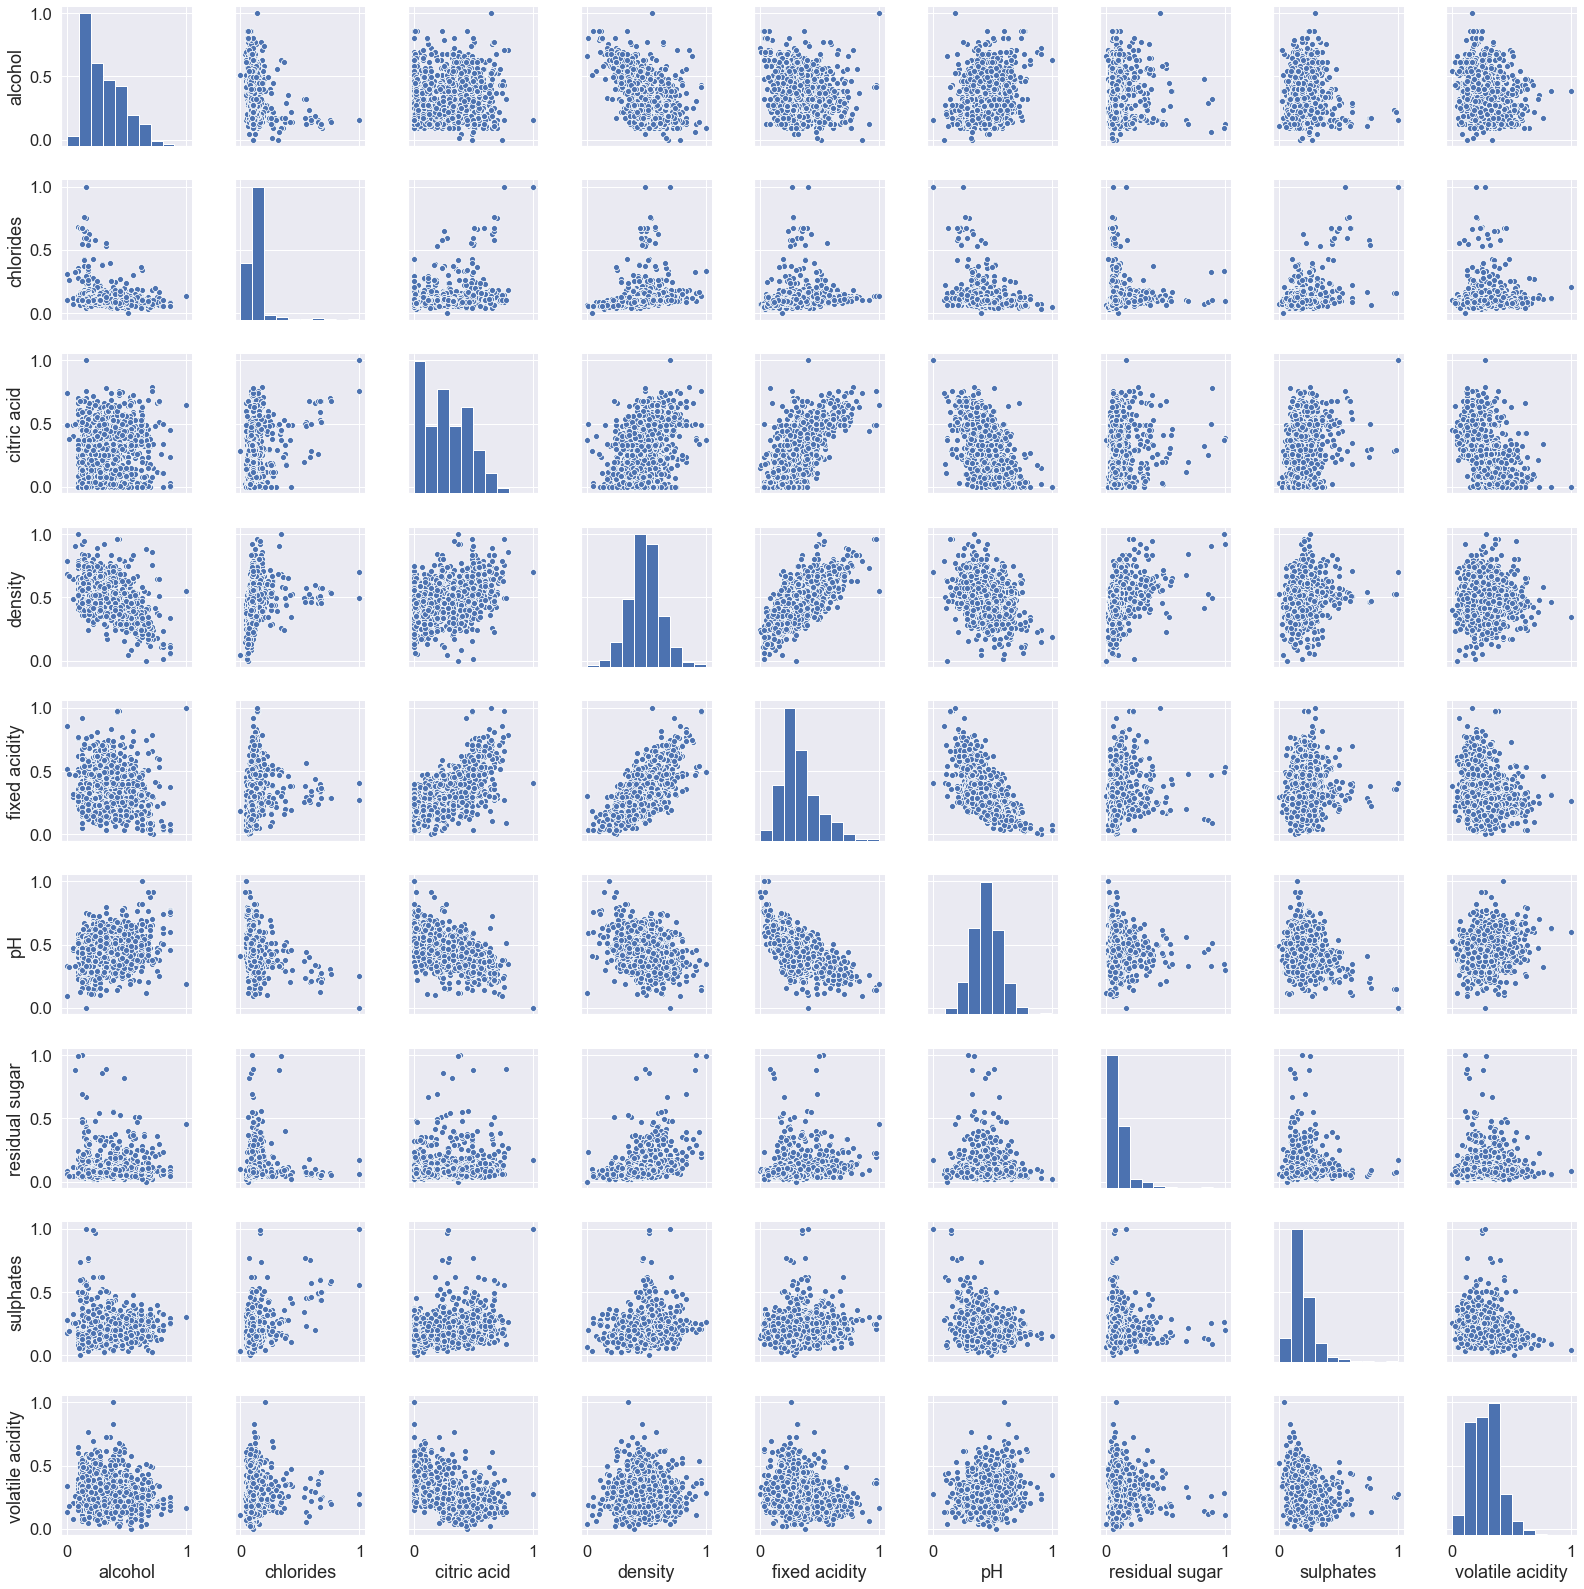

In [25]:
# sns.pairplot(X_scaled)
# plt.show()

'fixed acidity' : '고정 산도', 　　'volatile acidity' :'휘발성 산도', 　　'citric acid' '구연산',<br>
'residual sugar': '잔류 당',　　　'chlorides': '염화물, 　　　'free sulfur dioxide':'유리아황산',<br>
'total sulfur dioxide':'총 이산화황',　'density': '밀도', 　　　　　　　　'pH':'pH', <br>
'sulphates':'황산염', 　　　　　　　'alcohol': '알코올', 　　　　　　'quality' :'품질'

In [26]:
red_final = red[red.columns.difference(['free sulfur dioxide','total sulfur dioxide'])]
red_final.tail()

,alcohol,chlorides,citric acid,density,fixed acidity,pH,quality,residual sugar,sulphates,volatile acidity
1594,10.5,0.090,0.08,0.99490,6.2,3.45,0,2.0,0.58,0.600
1595,11.2,0.062,0.10,0.99512,5.9,3.52,1,2.2,0.76,0.550
1596,11.0,0.076,0.13,0.99574,6.3,3.42,1,2.3,0.75,0.510
1597,10.2,0.075,0.12,0.99547,5.9,3.57,0,2.0,0.71,0.645
1598,11.0,0.067,0.47,0.99549,6.0,3.39,1,3.6,0.66,0.310


In [27]:
red_final = red_final[['alcohol', 'chlorides', 'citric acid', 'density', 'fixed acidity', 'pH',
                      'residual sugar', 'sulphates', 'volatile acidity', 'quality']]
red_final.tail()

,alcohol,chlorides,citric acid,density,fixed acidity,pH,residual sugar,sulphates,volatile acidity,quality
1594,10.5,0.090,0.08,0.99490,6.2,3.45,2.0,0.58,0.600,0
1595,11.2,0.062,0.10,0.99512,5.9,3.52,2.2,0.76,0.550,1
1596,11.0,0.076,0.13,0.99574,6.3,3.42,2.3,0.75,0.510,1
1597,10.2,0.075,0.12,0.99547,5.9,3.57,2.0,0.71,0.645,0
1598,11.0,0.067,0.47,0.99549,6.0,3.39,3.6,0.66,0.310,1


- 정규화 안한거 - red_final
- 정규화(품질 빼고) - X_scaled

In [28]:
red_final[red_final.columns[:-1]][-5:]

,alcohol,chlorides,citric acid,density,fixed acidity,pH,residual sugar,sulphates,volatile acidity
1594,10.5,0.090,0.08,0.99490,6.2,3.45,2.0,0.58,0.600
1595,11.2,0.062,0.10,0.99512,5.9,3.52,2.2,0.76,0.550
1596,11.0,0.076,0.13,0.99574,6.3,3.42,2.3,0.75,0.510
1597,10.2,0.075,0.12,0.99547,5.9,3.57,2.0,0.71,0.645
1598,11.0,0.067,0.47,0.99549,6.0,3.39,3.6,0.66,0.310


In [29]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

X_data = red_final[red_final.columns[:-1]].values
y_data = red_final['quality'].values
X_train, X_test, y_train, y_test = \
train_test_split(X_data, y_data, test_size=0.2, stratify=y_data, random_state = 42)

In [30]:
# X_train, val_input, y_train, val_target = \
# train_test_split(X_train, y_train, test_size=0.2, stratify=y_data, random_state = 42)

In [31]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_validate

sc = SGDClassifier(loss='log', max_iter=5, random_state=42)
# 로지스틱 손실함수  # max_iter : 반복 epoch

scores = cross_validate(sc, X_train, y_train, n_jobs=-1)  # 교차검증 (기본5개)
print(np.mean(scores['test_score']))     # n_jobs=-1 모든 프로세서를 사용하는 것을 의미

0.5698958333333334


In [32]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation = 'relu', input_shape= (9,)))
model.add(keras.layers.Dense(32, activation = 'relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(16, activation = 'sigmoid'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1000      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                3232      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                170       
Total params: 4,930
Trainable params: 4,930
Non-trainable params: 0
_________________________________________________________________


In [34]:
# X_train, X_test, y_train, y_test = \
# train_test_split(X_data, y_data, test_size=0.2, stratify=y_data, random_state = 42)

In [35]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# 복구점
checkpoint_cb = keras.callbacks.ModelCheckpoint('wine-model.h5')
# 조기종료
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

# 모델 학습
history = model.fit(X_train, y_train, epochs = 300, callbacks=[checkpoint_cb, early_stopping_cb], validation_split=0.2)

Train on 1023 samples, validate on 256 samples
Epoch 1/300
1023/1023 [==============================] - 1s 1ms/sample - loss: 1.5795 - accuracy: 0.4761 - val_loss: 1.1545 - val_accuracy: 0.5469
Epoch 2/300
1023/1023 [==============================] - 0s 402us/sample - loss: 1.1439 - accuracy: 0.5347 - val_loss: 0.9603 - val_accuracy: 0.5469
Epoch 3/300
1023/1023 [==============================] - 0s 430us/sample - loss: 0.9779 - accuracy: 0.5220 - val_loss: 0.8749 - val_accuracy: 0.5469
Epoch 4/300
1023/1023 [==============================] - 0s 365us/sample - loss: 0.8859 - accuracy: 0.5367 - val_loss: 0.8252 - val_accuracy: 0.5469
Epoch 5/300
1023/1023 [==============================] - 0s 396us/sample - loss: 0.8286 - accuracy: 0.5357 - val_loss: 0.7930 - val_accuracy: 0.5469
Epoch 6/300
1023/1023 [==============================] - 0s 403us/sample - loss: 0.8029 - accuracy: 0.5191 - val_loss: 0.7718 - val_accuracy: 0.5469
Epoch 7/300
1023/1023 [==============================] - 0s 2

In [36]:
model.evaluate(X_train, y_train, verbose=0)

[0.5568809231759236, 0.724785]

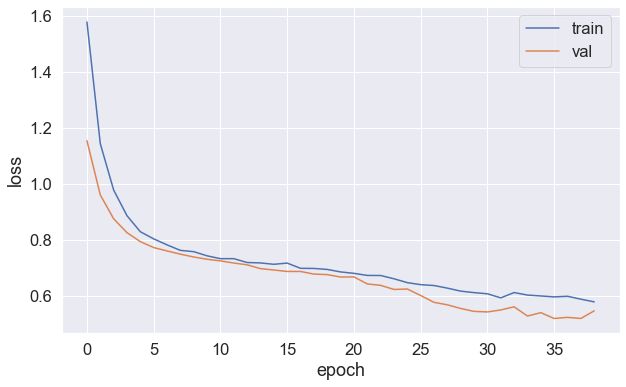

In [37]:
# 훈련손실과 검증손실 시각화
plt.rcParams['figure.figsize'] = [10, 6]
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [38]:
lengths = np.array([len(x) for x in X_train])
print(np.mean(lengths), np.median(lengths))

9.0 9.0


In [39]:
train_input, val_input, train_target, val_target =\
train_test_split(X_train, y_train, stratify=y_train, test_size=.2, random_state=42)

In [40]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=9)
train_seq.shape

(1023, 9)

In [41]:
print(train_seq[0])

[9 0 0 0 6 3 4 0 0]


In [42]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(1023, 16, input_shape=(9,)))
model2.add(keras.layers.SimpleRNN(8)) # 8개층
model2.add(keras.layers.Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 9, 16)             16368     
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 8)                 200       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 16,577
Trainable params: 16,577
Non-trainable params: 0
_________________________________________________________________


In [43]:
# 모델 생성
model3 = keras.Sequential()
model3.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(9,)))
model3.add(keras.layers.Dense(10, activation='softmax'))

In [44]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 100)               1000      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
Total params: 2,010
Trainable params: 2,010
Non-trainable params: 0
_________________________________________________________________


In [45]:
# 모델 설정 (최적화)
model3.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 복구점
checkpoint_cb = keras.callbacks.ModelCheckpoint('wine3.h5')
# 조기종료
early_stopping_cb = keras.callbacks.EarlyStopping(patience=7, 
                                                  restore_best_weights=True)

# 모델 훈련
history = model3.fit(X_train, y_train, epochs=30, validation_split=0.2,
                     callbacks=[checkpoint_cb, early_stopping_cb])

Train on 1023 samples, validate on 256 samples
Epoch 1/30
1023/1023 [==============================] - 1s 529us/sample - loss: 1.2259 - accuracy: 0.4379 - val_loss: 0.8236 - val_accuracy: 0.4414
Epoch 2/30
1023/1023 [==============================] - 0s 107us/sample - loss: 0.7630 - accuracy: 0.4819 - val_loss: 0.7178 - val_accuracy: 0.5234
Epoch 3/30
1023/1023 [==============================] - 0s 232us/sample - loss: 0.7130 - accuracy: 0.4848 - val_loss: 0.6956 - val_accuracy: 0.5664
Epoch 4/30
1023/1023 [==============================] - 0s 101us/sample - loss: 0.6940 - accuracy: 0.5503 - val_loss: 0.6819 - val_accuracy: 0.5469
Epoch 5/30
1023/1023 [==============================] - 0s 203us/sample - loss: 0.6848 - accuracy: 0.5718 - val_loss: 0.6707 - val_accuracy: 0.5469
Epoch 6/30
1023/1023 [==============================] - 0s 100us/sample - loss: 0.6785 - accuracy: 0.5640 - val_loss: 0.6584 - val_accuracy: 0.7500
Epoch 7/30
1023/1023 [==============================] - 0s 60us/s

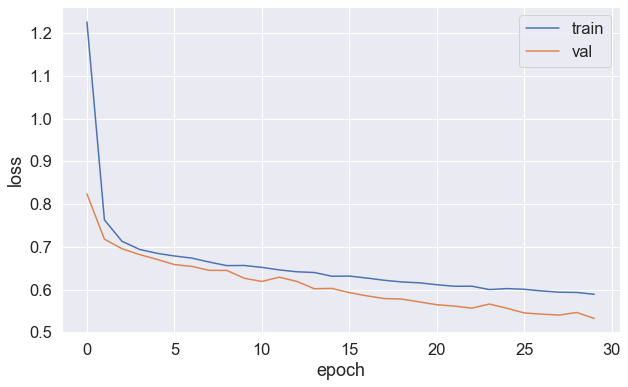

In [46]:
# 훈련손실과 검증손실 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [61]:
model3.evaluate(X_train, y_train, verbose=0)

[0.5738401150824597, 0.7224394]

In [62]:
# 로지스틱 디시즌트리 케이민즈
logistic = LogisticRegression(C=0.001, random_state=42)
tree = DecisionTreeClassifier(max_depth=None, criterion='entropy', random_state=42)
knn = KNeighborsClassifier(n_neighbors=1, p=2, metric='manhattan')

voting_estimators = [('logistic', logistic), ('tree', tree), ('knn', knn)]

voting = VotingClassifier(estimators = voting_estimators, voting='soft')

clf_labels = ['Logistic regression', 'Decision tree', 'KNN', 'Majority voting']
all_clf = [logistic, tree, knn, voting]

In [63]:
voting.fit(X_train, y_train)
pred = voting.predict(X_test)
print('보팅 분류기의 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

보팅 분류기의 정확도 : 0.8156


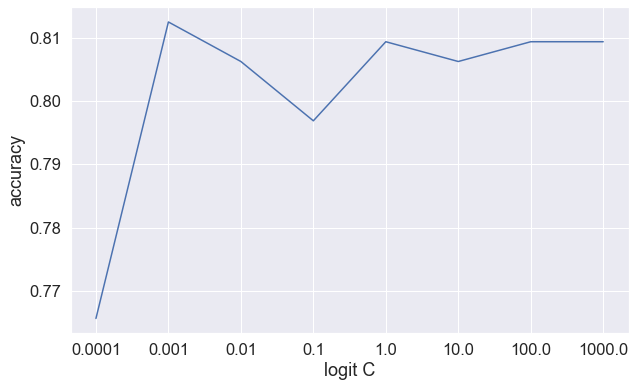

정확도 최댓값 : 0.8125


logit C,0.0001,0.001,0.01,0.1,1.0,10.0,100.0,1000.0
accuracy,0.765625,0.8125,0.80625,0.796875,0.809375,0.80625,0.809375,0.809375


In [49]:
# logic C 변화 - penalty 규제

esb_li = []         # ensemble_list (accuracy)

for i in range(8):
    penalty = 1e-4 * 10**i
    
    logistic = LogisticRegression(C=penalty, random_state=42)
    tree = DecisionTreeClassifier(max_depth=20, criterion='entropy', random_state=42)
    knn = KNeighborsClassifier(n_neighbors=1, p=2, metric='manhattan') # metric='minkowski'

    voting_estimators = [('logistic', logistic), ('tree', tree), ('knn', knn)]

    voting = VotingClassifier(estimators = voting_estimators, voting='soft')

    clf_labels = ['Logistic regression', 'Decision tree', 'KNN', 'Majority voting']
    all_clf = [logistic, tree, knn, voting]
    
    voting.fit(X_train, y_train)
    pred = voting.predict(X_test)
    esb_li.append(accuracy_score(y_test, pred))
    
plt.plot(esb_li)
plt.xticks(list(range(8)), list(map(str, [1e-4 * 10**i for i in range(8)])))
plt.xlabel('logit C')
plt.ylabel('accuracy')
plt.show()

print("정확도 최댓값 :",max(esb_li))
esb_df = pd.DataFrame(esb_li).T
esb_df.index = ['accuracy']
esb_df.columns = list(map(str, [1e-4 * 10**i for i in range(8)]))
esb_df.columns.name = 'logit C'
esb_df

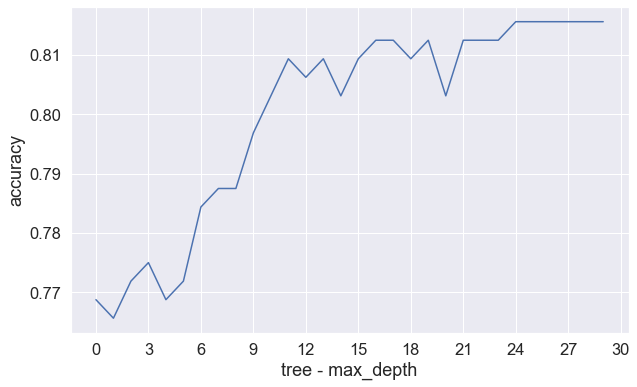

정확도 최댓값 : 0.815625


max_depth,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
accuracy,0.76875,0.765625,0.771875,0.775,0.76875,0.771875,0.784375,0.7875,0.7875,0.796875,...,0.803125,0.8125,0.8125,0.8125,0.815625,0.815625,0.815625,0.815625,0.815625,0.815625


In [50]:
# tree max_depth 변화

esb_li = []         # ensemble_list (accuracy)

for depth in list(range(1,31)):
    
    logistic = LogisticRegression(C=0.001, random_state=42)
    tree = DecisionTreeClassifier(max_depth=depth, criterion='entropy', random_state=42)
    knn = KNeighborsClassifier(n_neighbors=1, p=2, metric='manhattan') # metric='minkowski'

    voting_estimators = [('logistic', logistic), ('tree', tree), ('knn', knn)]

    voting = VotingClassifier(estimators = voting_estimators, voting='soft')

    clf_labels = ['Logistic regression', 'Decision tree', 'KNN', 'Majority voting']
    all_clf = [logistic, tree, knn, voting]
    
    voting.fit(X_train, y_train)
    pred = voting.predict(X_test)
    esb_li.append(accuracy_score(y_test, pred))
    
plt.plot(esb_li)
plt.xticks(range(0,31,3))
plt.xlabel('tree - max_depth')
plt.ylabel('accuracy')
plt.show()

print("정확도 최댓값 :",max(esb_li))
esb_df = pd.DataFrame(esb_li).T
esb_df.index = ['accuracy']
esb_df.columns.name = 'max_depth'
esb_df

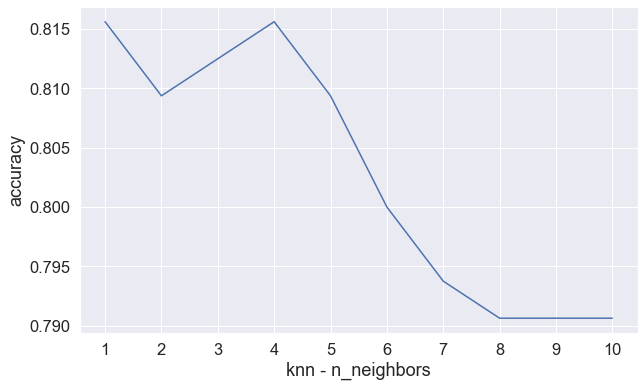

정확도 최댓값 : 0.815625


neighbors k,1,2,3,4,5,6,7,8,9,10
accuracy,0.815625,0.809375,0.8125,0.815625,0.809375,0.8,0.79375,0.790625,0.790625,0.790625


In [51]:
# knn k 변화

esb_li = []         # ensemble_list (accuracy)

for k in list(range(1,11)):
    
    logistic = LogisticRegression(C=0.001, random_state=42)
    tree = DecisionTreeClassifier(max_depth=None, criterion='entropy', random_state=42)
    knn = KNeighborsClassifier(n_neighbors=k, p=2, metric='manhattan') # metric='minkowski'

    voting_estimators = [('logistic', logistic), ('tree', tree), ('knn', knn)]

    voting = VotingClassifier(estimators = voting_estimators, voting='soft')

    clf_labels = ['Logistic regression', 'Decision tree', 'KNN', 'Majority voting']
    all_clf = [logistic, tree, knn, voting]
    
    voting.fit(X_train, y_train)
    pred = voting.predict(X_test)
    esb_li.append(accuracy_score(y_test, pred))
    
plt.plot(esb_li)
plt.xticks(range(10), range(1,11))
plt.xlabel('knn - n_neighbors')
plt.ylabel('accuracy')
plt.show()

print("정확도 최댓값 :",max(esb_li))
pd.set_option('display.max_columns', None) # 중간생략없이 모두 출력
esb_df = pd.DataFrame(esb_li).T
esb_df.index = ['accuracy']
esb_df.columns = list(range(1,11))
esb_df.columns.name = 'neighbors k'
esb_df

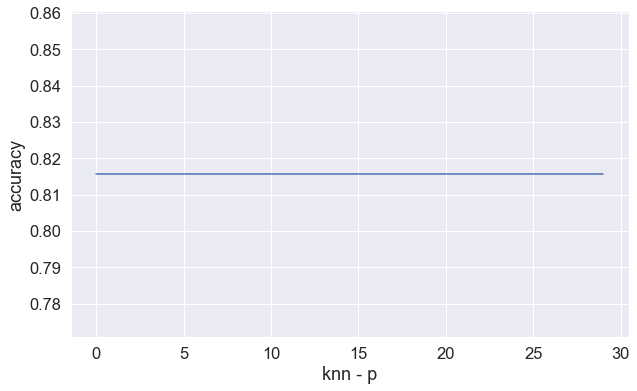

정확도 최댓값 : 0.815625


knn p,1,2,3,4,5,...,26,27,28,29,30
accuracy,0.815625,0.815625,0.815625,0.815625,0.815625,...,0.815625,0.815625,0.815625,0.815625,0.815625


In [52]:
# knn p 변화

esb_li = []         # ensemble_list (accuracy)

for p in list(range(1,31)):
    
    logistic = LogisticRegression(C=0.001, random_state=42)
    tree = DecisionTreeClassifier(max_depth=None, criterion='entropy', random_state=42)
    knn = KNeighborsClassifier(n_neighbors=1, p=p, metric='manhattan') # metric='minkowski'

    voting_estimators = [('logistic', logistic), ('tree', tree), ('knn', knn)]

    voting = VotingClassifier(estimators = voting_estimators, voting='soft')

    clf_labels = ['Logistic regression', 'Decision tree', 'KNN', 'Majority voting']
    all_clf = [logistic, tree, knn, voting]
    
    voting.fit(X_train, y_train)
    pred = voting.predict(X_test)
    esb_li.append(accuracy_score(y_test, pred))
    
plt.plot(esb_li)
# plt.xticks(range(0,31,5), list(range(5,31,4))
plt.xlabel('knn - p')
plt.ylabel('accuracy')
plt.show()

print("정확도 최댓값 :",max(esb_li))
esb_df = pd.DataFrame(esb_li).T
pd.set_option('max_columns', 10)
esb_df.index = ['accuracy']
esb_df.columns = list(range(1,31))
esb_df.columns.name = 'knn p'
esb_df

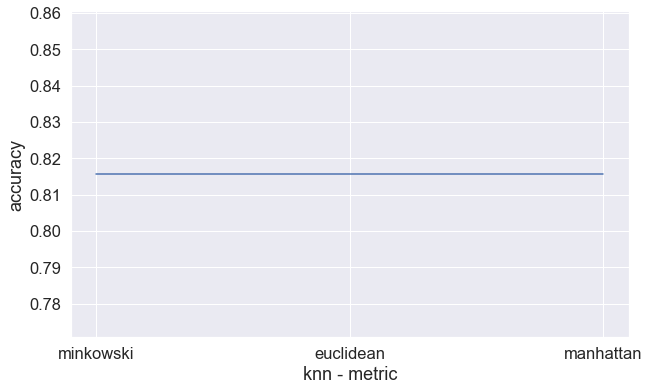

정확도 최댓값 : 0.815625


metric,minkowski,euclidean,manhattan
accuracy,0.815625,0.815625,0.815625


In [53]:
# knn metric 변화 ('minkowski', 'euclidean', 'manhattan')

esb_li = []         # ensemble_list (accuracy)
met = ['minkowski', 'euclidean', 'manhattan']
for metric in met:
    
    logistic = LogisticRegression(C=0.001, random_state=42)
    tree = DecisionTreeClassifier(max_depth=None, criterion='entropy', random_state=42)
    knn = KNeighborsClassifier(n_neighbors=1, p=2, metric=metric) # metric='minkowski'

    voting_estimators = [('logistic', logistic), ('tree', tree), ('knn', knn)]

    voting = VotingClassifier(estimators = voting_estimators, voting='soft')

    clf_labels = ['Logistic regression', 'Decision tree', 'KNN', 'Majority voting']
    all_clf = [logistic, tree, knn, voting]
    
    voting.fit(X_train, y_train)
    pred = voting.predict(X_test)
    esb_li.append(accuracy_score(y_test, pred))
    
plt.plot(esb_li)
plt.xticks(range(3),met)
plt.xlabel('knn - metric')
plt.ylabel('accuracy')
plt.show()

print("정확도 최댓값 :",max(esb_li))
esb_df = pd.DataFrame(esb_li).T
# pd.set_option('max_columns', 10)
esb_df.index = ['accuracy']
esb_df.columns = met
esb_df.columns.name = 'metric'
esb_df

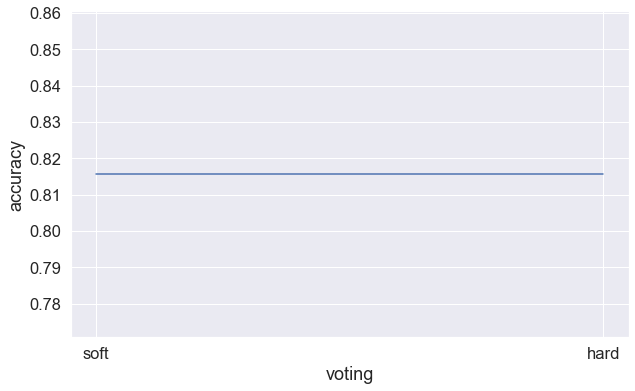

정확도 최댓값 : 0.815625


voting,soft,hard
accuracy,0.815625,0.815625


In [54]:
# voting 변화 ('soft', 'hard')

esb_li = []         # ensemble_list (accuracy)
vt_li = ['soft', 'hard']
for vt in vt_li:
    
    logistic = LogisticRegression(C=0.001, random_state=42)
    tree = DecisionTreeClassifier(max_depth=None, criterion='entropy', random_state=42)
    knn = KNeighborsClassifier(n_neighbors=1, p=2, metric='manhattan')

    voting_estimators = [('logistic', logistic), ('tree', tree), ('knn', knn)]

    voting = VotingClassifier(estimators = voting_estimators, voting=vt)

    clf_labels = ['Logistic regression', 'Decision tree', 'KNN', 'Majority voting']
    all_clf = [logistic, tree, knn, voting]
    
    voting.fit(X_train, y_train)
    pred = voting.predict(X_test)
    esb_li.append(accuracy_score(y_test, pred))
    
plt.plot(esb_li)
plt.xticks(range(2),vt_li)
plt.xlabel('voting')
plt.ylabel('accuracy')
plt.show()

print("정확도 최댓값 :",max(esb_li))
esb_df = pd.DataFrame(esb_li).T
# pd.set_option('max_columns', 10)
esb_df.index = ['accuracy']
esb_df.columns = vt_li
esb_df.columns.name = 'voting'
esb_df

In [55]:
classifiers = [logistic, tree, knn]
for i in classifiers:
    i.fit(X_train, y_train)
    pred = i.predict(X_test)
    class_name = i.__class__.__name__
    print('{0} 정확도 : {1:.4f}'.format(
        class_name, accuracy_score(y_test, pred)))

LogisticRegression 정확도 : 0.7219
DecisionTreeClassifier 정확도 : 0.7906
KNeighborsClassifier 정확도 : 0.7688


In [56]:
# Naive Bayes
# 나이브 베이즈는 언어와 관련된 부분에서 많이 사용된다. 메일에서 스팸/햄 을 구분하는 문제가 대표적인 경우
# 또한 속성이 아주 많지만 대부분의 속성이 0/1 과 같은 이산적인 특성을 가질 때, 훈련데이터가 많지 않아도 좋은 성능을 보여준다.

GaussianNB() pred accuracy : 0.721875
BernoulliNB() pred accuracy : 0.534375
MultinomialNB() pred accuracy : 0.590625


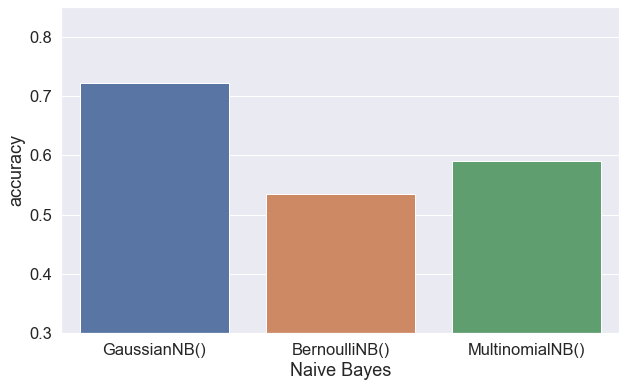

In [57]:
gnb = GaussianNB()
brn = BernoulliNB()
mn = MultinomialNB()

acc_li = []

for nb in [gnb, brn, mn]:
    y_pred = nb.fit(X_train, y_train).predict(X_test)
    acc = (y_test == y_pred).sum() / len(y_pred)
    acc_li.append(acc)
    print(nb, 'pred accuracy :', acc)

sns.barplot([gnb, brn, mn], acc_li)
plt.xlabel('Naive Bayes')
plt.ylabel('accuracy')
plt.ylim(0.3, 0.85)
plt.show()

In [58]:
svc=SVC()
# svc.fit(X_train, y_train)
# cross_val_score(svc, X_test, y_test, cv=10).mean()
y_pred = svc.fit(X_train, y_train).predict(X_test)
print((y_test == y_pred).sum()/len(y_pred))

0.71875


In [59]:
sc = SGDClassifier(loss='log', max_iter=5, random_state=42)
scores = cross_validate(sc, X_train, y_train, n_jobs=-1)
print(np.mean(scores['test_score']))

0.5698958333333334
